### Name : S.M.Hedayatullah
### Enroll No. 0010

## PPT: Deep Learning and Neural Network

### Dataset 

In [ ]:
# Name : SMSSpamCollection     . It's  a tsv file
# Location: https://mitu.co.in/dataset/

#### Import the libraries

In [1]:
import pandas as pd
import seaborn as sns

#### Read the Data

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text']) # We assign labels

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# For this thing above, operation will be done the same way . Preprocessing will be same as we have done earlier  

### Separate input and output data

In [4]:
# Input data   
x = df['text']
y = df['label']

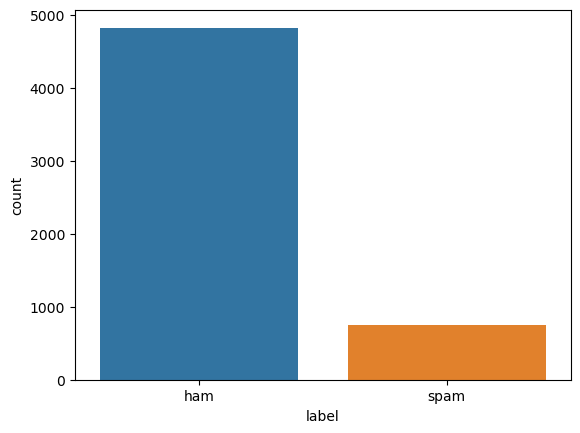

In [5]:
# This is an imbalanced data
sns.countplot(x=y);

###  Q : How to balance an imbalanced data : There is a concept called Re-sampling. Randon over sampler and random under sampler

### Here we will use SMOT to balance data. Its present in Python and called Imbalance learn

###  Second method is cost sensitive machine learning

In [6]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


### Data Preparation

#### Data Cleaning

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [10]:
swords = stopwords.words('english')

In [12]:
# Define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x.lower() for x in tokens2 if x in tokens2 if x not in swords]
    return tokens3

In [14]:
# Check if the function is working fine
new_sent = 'It was the expected result. They told the same on fields'
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

In [15]:
# New let's Vectorize the data

### TD*IDF Vectorization

In [17]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Create object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [21]:
# Perfrom the operation
x_new = tfidf.fit_transform(x)

In [25]:
x_new.shape    #5572 rows and 7217 columns/unique words are there . Their Tf*Idf score will be present below in the data

(5572, 7217)

### Note: Apply the Data Balancing only after Vectorization

In [27]:
x    # Features

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [28]:
y   # The output is not in numerical form.See below

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

#### Note: For Neural Network we need to change the output in number format . We use encoding for that

### Encoding of output variable by using Label Encoder

In [30]:
# import the class 
from sklearn.preprocessing import LabelEncoder

In [31]:
# create the object
le = LabelEncoder()

In [32]:
# Apply the encoding
y_new = le.fit_transform(y)
y_new     # ham is 0 is spam is 1

array([0, 0, 1, ..., 0, 0, 0])

#### Note: We dont need to do the encoding in Machine learning because it considers only the input

In [34]:
# To see the classes
le.classes_     # ham is 0 and spam is 1

array(['ham', 'spam'], dtype=object)

In [35]:
le.inverse_transform([0])

array(['ham'], dtype=object)

In [36]:
le.inverse_transform([1])

array(['spam'], dtype=object)

  # What is inverse transform ???